# Total Electricity with Exploratory Variables

In [2]:
import pandas as pd
from prophet import Prophet
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import logging
%matplotlib inline

In [3]:
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)


In [4]:
def calculate_mape(y_true, y_pred):
  return mean_absolute_percentage_error(y_true, y_pred) * 100

In [5]:
# Load the electricity usage data
NUM_CLUSTERS = 4

training_data = list()
testing_data = list()
validating_data = list()

for i in range(1, NUM_CLUSTERS + 1):
    original_train_data = pd.read_parquet(f'../dataset/cluster_{i}/training.parquet').dropna()
    original_test_data = pd.read_parquet(f'../dataset/cluster_{i}/validation.parquet').dropna()
    original_validation_data = pd.read_parquet(f'../dataset/cluster_{i}/test.parquet').dropna()
    
    train_total_consumption = original_train_data.sum(axis=0)
    training_data.append(train_total_consumption)

    test_total_consumption = original_test_data.sum(axis=0)
    testing_data.append(test_total_consumption)

    validation_total_consumption = original_validation_data.sum(axis=0)
    validating_data.append(validation_total_consumption)

In [6]:
# Load explanatory variables
explanatory_variables_df = pd.read_parquet('../dataset/combined_explanatory_variables/explanatory_variables.parquet')
explanatory_variables_df.index = pd.to_datetime(explanatory_variables_df.index)
explanatory_variables_df = explanatory_variables_df.sort_index().asfreq('D').dropna()
explanatory_variables_df.index = pd.to_datetime(explanatory_variables_df.index).floor('D')

In [7]:
# Combine electricity data with explanatory variables
combined_training_data = list()
combined_testing_data = list()
combined_validating_data = list()

for i in range(NUM_CLUSTERS):
    training_data[i].index = pd.to_datetime(training_data[i].index)
    testing_data[i].index = pd.to_datetime(testing_data[i].index)
    validating_data[i].index = pd.to_datetime(validating_data[i].index)

    train_data = pd.concat([training_data[i], explanatory_variables_df], axis=1).dropna()
    train_data = train_data.rename(columns={0: 'y'}).reset_index().rename(columns={'index': 'ds'})

    combined_training_data.append(train_data)

    test_data = pd.concat([testing_data[i], explanatory_variables_df], axis=1).dropna()
    test_data = test_data.rename(columns={0: 'y'}).reset_index().rename(columns={'index': 'ds'})

    combined_testing_data.append(test_data)

    valid_data = pd.concat([validating_data[i], explanatory_variables_df], axis=1).dropna()
    valid_data = valid_data.rename(columns={0: 'y'}).reset_index().rename(columns={'index': 'ds'})

    combined_validating_data.append(valid_data)

## Cluster 1

In [8]:
model1 = Prophet()
model1.add_regressor('heating_degree_days')
model1.add_regressor('cooling_degree_days')
model1.add_regressor('precip')
model1.add_regressor('precipprob')
model1.add_regressor('is_holiday')
model1.add_regressor('sunlight_length_hours')
model1.add_regressor('is_weekend')
model1.fit(combined_training_data[0])
cluster1_test = model1.predict(combined_testing_data[0].drop(columns=['y']))
cluster1_valid = model1.predict(combined_validating_data[0].drop(columns=['y']))

20:14:43 - cmdstanpy - INFO - Chain [1] start processing
20:14:43 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
plot_plotly(model1, cluster1_test)

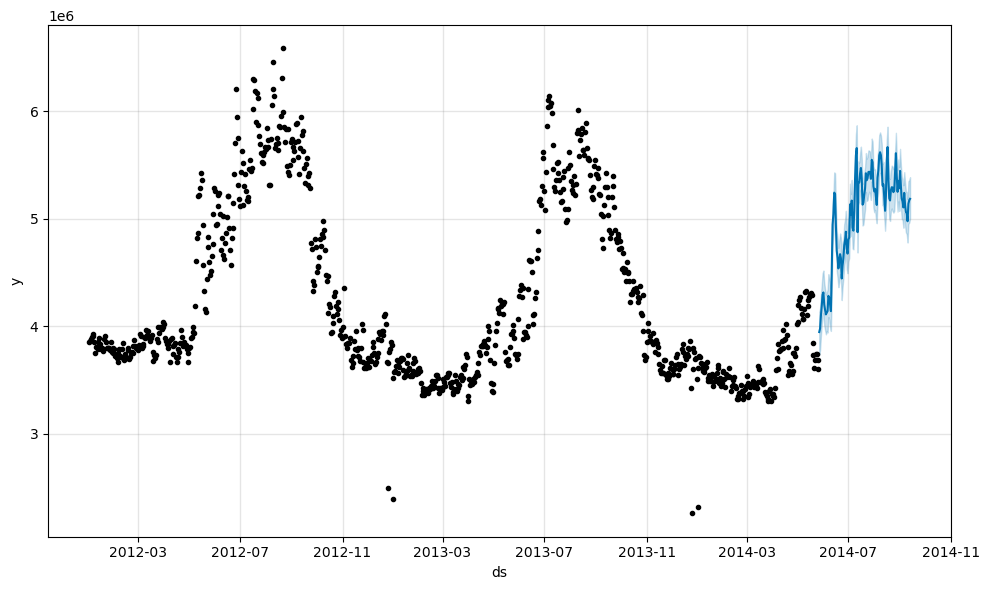

In [10]:
fig1 = model1.plot(cluster1_test)

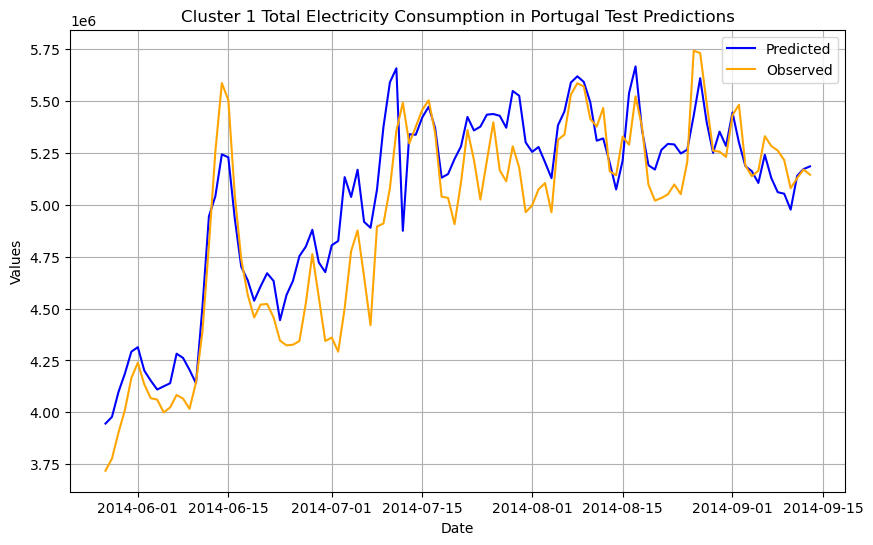

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(cluster1_test['ds'], cluster1_test['yhat'], label='Predicted', color='blue')
plt.plot(cluster1_test['ds'], combined_testing_data[0]['y'], label='Observed', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 1 Total Electricity Consumption in Portugal Test Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
plot_plotly(model1, cluster1_valid)

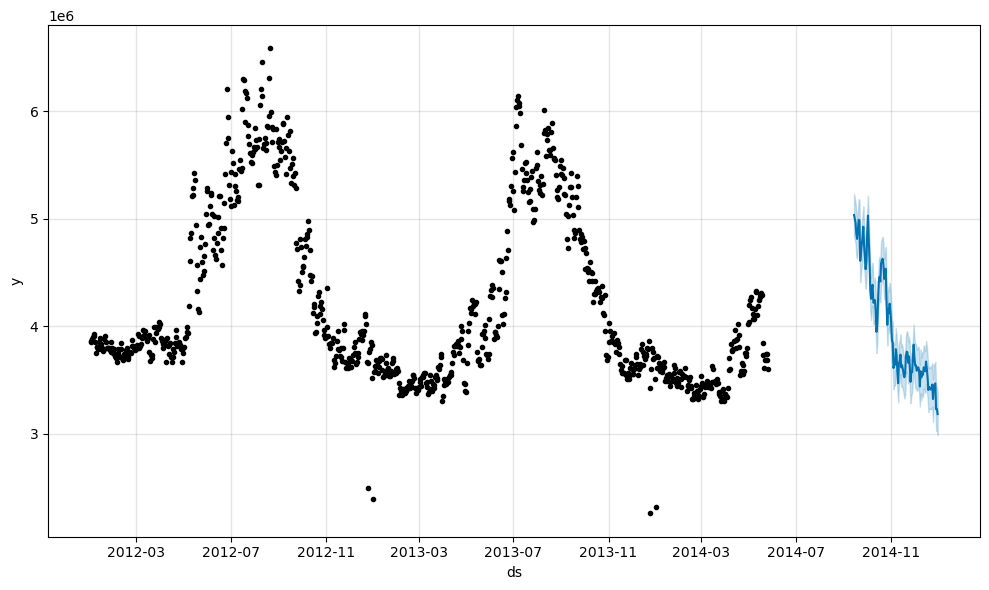

In [13]:
fig1 = model1.plot(cluster1_valid)

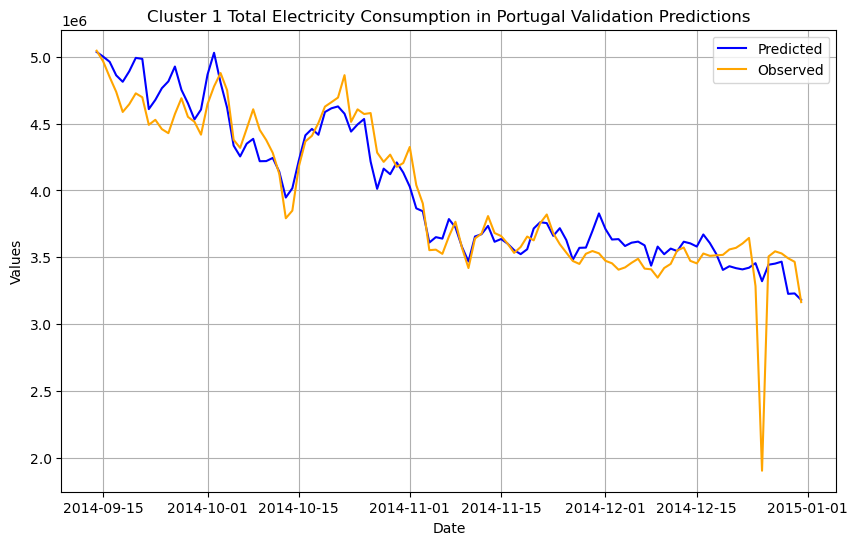

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(cluster1_valid['ds'], cluster1_valid['yhat'], label='Predicted', color='blue')
plt.plot(cluster1_valid['ds'], combined_validating_data[0]['y'], label='Observed', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 1 Total Electricity Consumption in Portugal Validation Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Find MAPE
test_mape = calculate_mape(combined_testing_data[0]['y'], cluster1_test['yhat'])
print(f'Test MAPE: {test_mape}')

valid_mape = calculate_mape(combined_validating_data[0]['y'], cluster1_valid['yhat'])
print(f'Validation MAPE: {valid_mape}')

Test MAPE: 3.5476422886657346
Validation MAPE: 3.6909732894150435


## Cluster 2

In [16]:
model2 = Prophet()
model2.add_regressor('heating_degree_days')
model2.add_regressor('cooling_degree_days')
model2.add_regressor('precip')
model2.add_regressor('precipprob')
model2.add_regressor('is_holiday')
model2.add_regressor('sunlight_length_hours')
model2.add_regressor('is_weekend')
model2.fit(combined_training_data[1])
cluster2_test = model2.predict(combined_testing_data[1].drop(columns=['y']))
cluster2_valid = model2.predict(combined_validating_data[1].drop(columns=['y']))

20:14:46 - cmdstanpy - INFO - Chain [1] start processing
20:14:46 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
plot_plotly(model2, cluster2_test)

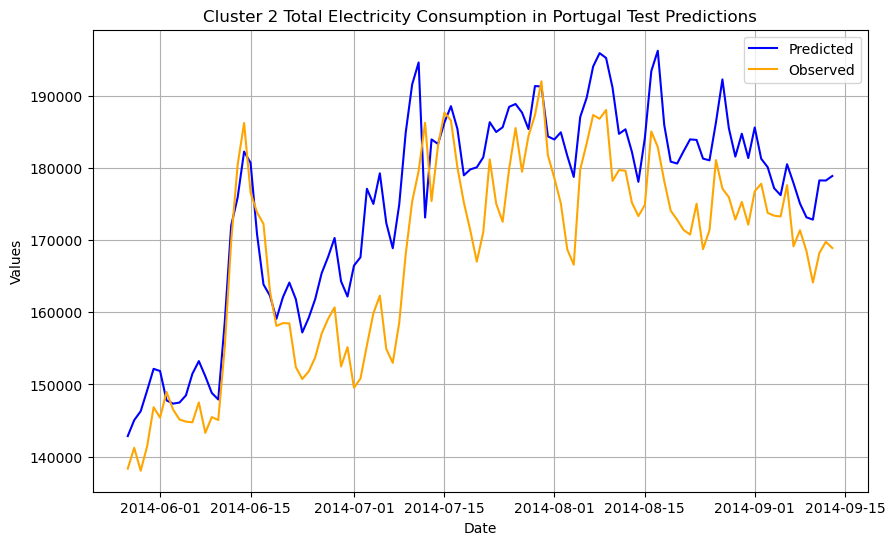

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(cluster2_test['ds'], cluster2_test['yhat'], label='Predicted', color='blue')
plt.plot(cluster2_test['ds'], combined_testing_data[1]['y'], label='Observed', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 2 Total Electricity Consumption in Portugal Test Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
plot_plotly(model2, cluster2_valid)

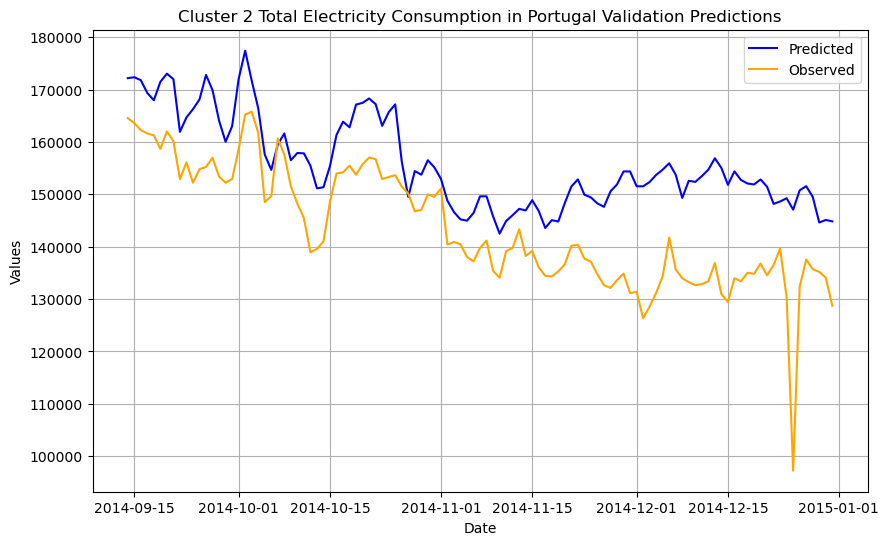

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(cluster2_valid['ds'], cluster2_valid['yhat'], label='Predicted', color='blue')
plt.plot(cluster2_valid['ds'], combined_validating_data[1]['y'], label='Observed', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 2 Total Electricity Consumption in Portugal Validation Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Find MAPE
test_mape = calculate_mape(combined_testing_data[1]['y'], cluster2_test['yhat'])
print(f'Test MAPE: {test_mape}')

valid_mape = calculate_mape(combined_validating_data[1]['y'], cluster2_valid['yhat'])
print(f'Validation MAPE: {valid_mape}')

Test MAPE: 4.679894567289209
Validation MAPE: 8.96710587492599


## Cluster 3

In [22]:
model3 = Prophet()
model3.add_regressor('heating_degree_days')
model3.add_regressor('cooling_degree_days')
model3.add_regressor('precip')
model3.add_regressor('precipprob')
model3.add_regressor('is_holiday')
model3.add_regressor('sunlight_length_hours')
model3.add_regressor('is_weekend')
model3.fit(combined_training_data[2])
cluster3_test = model3.predict(combined_testing_data[2].drop(columns=['y']))
cluster3_valid = model3.predict(combined_validating_data[2].drop(columns=['y']))

20:14:47 - cmdstanpy - INFO - Chain [1] start processing
20:14:47 - cmdstanpy - INFO - Chain [1] done processing


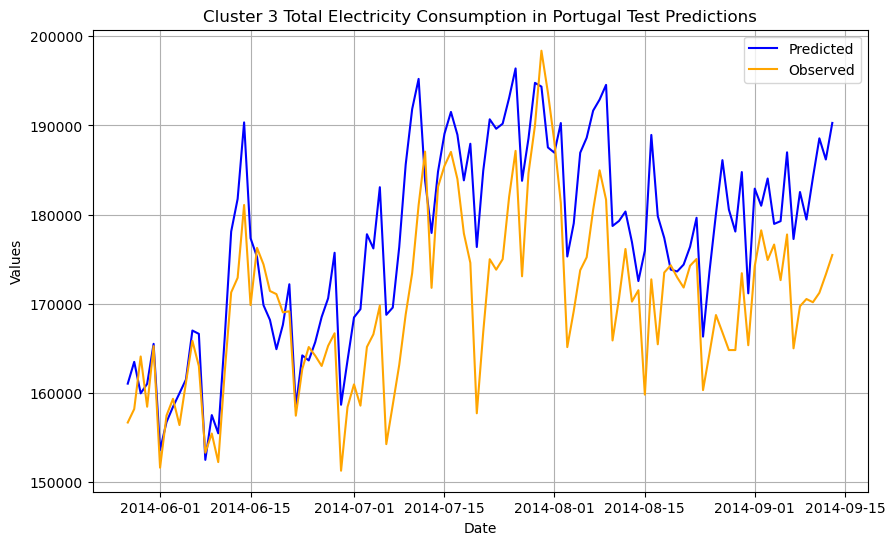

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(cluster3_test['ds'], cluster3_test['yhat'], label='Predicted', color='blue')
plt.plot(cluster3_test['ds'], combined_testing_data[2]['y'], label='Observed', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 3 Total Electricity Consumption in Portugal Test Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Find MAPE
test_mape = calculate_mape(combined_testing_data[2]['y'], cluster3_test['yhat'])
print(f'Test MAPE: {test_mape}')

valid_mape = calculate_mape(combined_validating_data[2]['y'], cluster3_valid['yhat'])
print(f'Validation MAPE: {valid_mape}')

Test MAPE: 4.569546666971207
Validation MAPE: 5.133476492559284


## Cluster 4

In [25]:
model4 = Prophet()
model4.add_regressor('heating_degree_days')
model4.add_regressor('cooling_degree_days')
model4.add_regressor('precip')
model4.add_regressor('precipprob')
model4.add_regressor('is_holiday')
model4.add_regressor('sunlight_length_hours')
model4.add_regressor('is_weekend')
model4.fit(combined_training_data[3])
cluster4_test = model4.predict(combined_testing_data[3].drop(columns=['y']))
cluster4_valid = model4.predict(combined_validating_data[3].drop(columns=['y']))

20:14:48 - cmdstanpy - INFO - Chain [1] start processing
20:14:48 - cmdstanpy - INFO - Chain [1] done processing


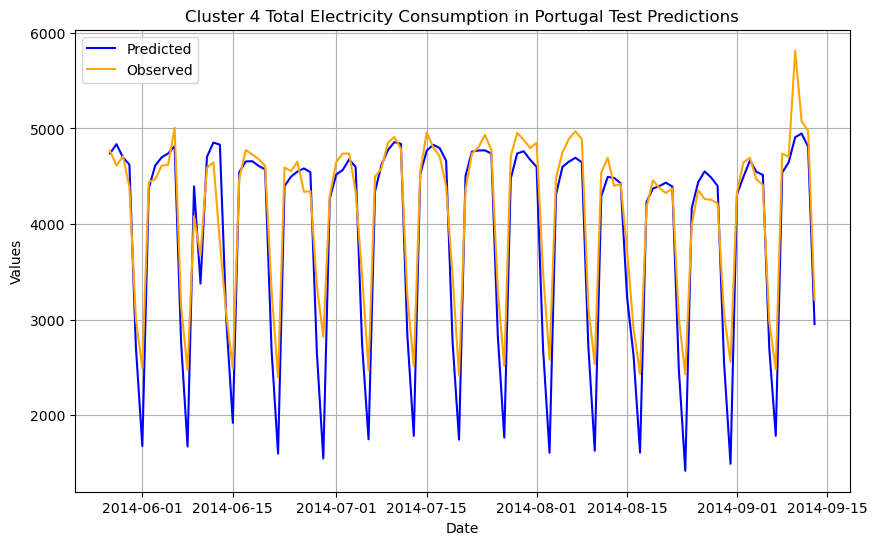

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(cluster4_test['ds'], cluster4_test['yhat'], label='Predicted', color='blue')
plt.plot(cluster4_test['ds'], combined_testing_data[3]['y'], label='Observed', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 4 Total Electricity Consumption in Portugal Test Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Find MAPE
test_mape = calculate_mape(combined_testing_data[3]['y'], cluster4_test['yhat'])
print(f'Test MAPE: {test_mape}')

valid_mape = calculate_mape(combined_validating_data[3]['y'], cluster4_valid['yhat'])
print(f'Validation MAPE: {valid_mape}')

Test MAPE: 9.117562096933405
Validation MAPE: 8.941639657938525
